## Importacion de librerias

In [1]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

In [14]:
free_comps = sb.competitions()
free_comps

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [11]:
#free_comps.groupby("country_name")[["season_name"]].sum()

In [12]:
champions = free_comps[free_comps["country_name"] == "Europe"]
champions

NameError: name 'free_comps' is not defined

In [13]:
mundial = free_comps[free_comps["country_name"] == "International"]
mundial.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
28,1470,274,International,FIFA U20 World Cup,male,False,False,1979,2024-02-13T14:20:59.825440,None,None,2024-02-13T14:20:59.825440
29,43,106,International,FIFA World Cup,male,False,True,2022,2024-05-15T10:23:32.854925,2024-06-11T11:30:50.462448,2024-06-11T11:30:50.462448,2024-05-15T10:23:32.854925
30,43,3,International,FIFA World Cup,male,False,True,2018,2024-06-12T07:38:19.345758,2021-06-13T16:17:31.694,None,2024-06-12T07:38:19.345758
31,43,55,International,FIFA World Cup,male,False,True,1990,2023-06-28T10:58:20.137929,2021-06-12T16:17:31.694,None,2023-06-28T10:58:20.137929
32,43,54,International,FIFA World Cup,male,False,True,1986,2023-12-26T22:34:04.263530,2021-06-13T16:17:31.694,None,2023-12-26T22:34:04.263530


In [7]:
#/spain = free_comps[free_comps["country_name"] == "Spain"]
#spain

#Importación de los partidos

In [2]:
mundial_2022 = sb.matches(competition_id=43, season_id=106)
list_matches=mundial_2022.match_id.tolist()

In [3]:
events = []
for n in list_matches:
    match_events = sb.events(match_id = n)
events.append(match_events)
events=pd.concat(events)

In [18]:
mundial_2022[mundial_2022["home_team"]=="Argentina"]

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
9,3869685,2022-12-18,17:00:00.000,International - FIFA World Cup,2022,Argentina,France,3,3,available,...,2023-08-17T15:55:15.164685,7,Final,Lusail Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Didier Deschamps,1.1.0,2,2
13,3857289,2022-11-26,21:00:00.000,International - FIFA World Cup,2022,Argentina,Mexico,2,0,available,...,2023-06-20T11:57:08.547882,2,Group Stage,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Gerardo Daniel Martino,1.1.0,2,2
19,3869519,2022-12-13,21:00:00.000,International - FIFA World Cup,2022,Argentina,Croatia,3,0,available,...,2023-04-26T22:32:37.808359,6,Semi-finals,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Zlatko Dalić,1.1.0,2,2
37,3857300,2022-11-22,12:00:00.000,International - FIFA World Cup,2022,Argentina,Saudi Arabia,1,2,available,...,2023-06-19T15:59:46.628887,1,Group Stage,Lusail Stadium,Slavko Vinčić,Lionel Sebastián Scaloni,Hervé Renard,1.1.0,2,2


In [4]:
argentina_francia = sb.events(match_id = 3869685)
#argentina_francia

In [5]:
pases = argentina_francia[argentina_francia['type']=='Pass']
argentina_francia['type'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Foul Committed', 'Foul Won', 'Ball Recovery', 'Block',
       'Miscontrol', 'Clearance', 'Duel', 'Interception', 'Dribble',
       'Shot', 'Goal Keeper', 'Dispossessed', 'Dribbled Past',
       'Injury Stoppage', 'Player Off', 'Player On', 'Offside',
       'Substitution', 'Tactical Shift', 'Shield', '50/50', 'Half End',
       'Bad Behaviour'], dtype=object)

In [6]:
pases[['x','y']] = pases['location'].apply(pd.Series)
pases[['pass_end_x', 'pass_end_y']] = pases['pass_end_location'].apply(pd.Series)

C:\Users\Alan Iporre\AppData\Local\Temp\ipykernel_31480\839384823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases[['x','y']] = pases['location'].apply(pd.Series)
C:\Users\Alan Iporre\AppData\Local\Temp\ipykernel_31480\839384823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases[['x','y']] = pases['location'].apply(pd.Series)
C:\Users\Alan Iporre\AppData\Local\Temp\ipykernel_31480\839384823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [7]:
pases_argentina=pases[(pases["team"]=='Argentina')]
pases_francia = pases[(pases["team"]=='France')]

In [8]:
pases_totales = pases_argentina.groupby(['player'])['player'].count().to_frame()
completos = pases_argentina[pases_argentina['pass_outcome'].isnull()]
incompletos = pases_argentina[pases_argentina['pass_outcome'].notnull()]

In [9]:
pases_totales['completos'] = completos.groupby(['player'])['player'].count().to_frame()
pases_totales['incompletos'] = incompletos.groupby(['player'])['player'].count().to_frame()
pases_totales = pases_totales.fillna(0)
pases_totales

,player,completos,incompletos
player,,,
Alexis Mac Allister,52,45,7.0
Cristian Gabriel Romero,71,60,11.0
Damián Emiliano Martínez,33,18,15.0
Enzo Fernandez,94,79,15.0
Germán Alejandro Pezzella,1,1,0.0
Gonzalo Ariel Montiel,13,8,5.0
Julián Álvarez,32,26,6.0
Lautaro Javier Martínez,7,5,2.0
Leandro Daniel Paredes,15,15,0.0


In [10]:
pases_totales = pases_totales.rename(columns={'player' : 'pases totales'})
pases_totales = pases_totales.reset_index()
pases_totales['Porcentaje %'] = pases_totales['completos']/pases_totales['pases totales']*100
pases_totales = pases_totales[pases_totales['pases totales']>=10]

In [11]:
pases_totales

,player,pases totales,completos,incompletos,Porcentaje %
0,Alexis Mac Allister,52,45,7.0,86.538462
1,Cristian Gabriel Romero,71,60,11.0,84.507042
2,Damián Emiliano Martínez,33,18,15.0,54.545455
3,Enzo Fernandez,94,79,15.0,84.042553
5,Gonzalo Ariel Montiel,13,8,5.0,61.538462
6,Julián Álvarez,32,26,6.0,81.250000
8,Leandro Daniel Paredes,15,15,0.0,100.000000
9,Lionel Andrés Messi Cuccittini,60,49,11.0,81.666667
10,Marcos Javier Acuña,28,19,9.0,67.857143
11,Nahuel Molina Lucero,56,39,17.0,69.642857


In [12]:
pases_totales['player'] = pases_totales['player'].replace(['Lionel Andrés Messi Cuccittini'],'Leo Messi')
pases_totales['player'] = pases_totales['player'].replace(['Damián Emiliano Martínez'],'Emi Martinez')
pases_totales['player'] = pases_totales['player'].replace(['Germán Alejandro Pezzella'],'Pezzella')
pases_totales['player'] = pases_totales['player'].replace(['Lautaro Javier Martínez'],'Lautaro M')
pases_totales['player'] = pases_totales['player'].replace(['Leandro Daniel Paredes'],'L.Paredes')
pases_totales['player'] = pases_totales['player'].replace(['Nicolás Alejandro Tagliafico'],'Tagliafico')
pases_totales['player'] = pases_totales['player'].replace(['Ángel Fabián Di María Hernández'],'Di María')
pases_totales['player'] = pases_totales['player'].replace(['Nicolás Hernán Otamendi'],'N.Otamendi')
pases_totales['player'] = pases_totales['player'].replace(['Cristian Gabriel Romero'],'Romero')

In [13]:
top_10_porcentaje = pases_totales.sort_values('Porcentaje %', ascending = True).tail(10)

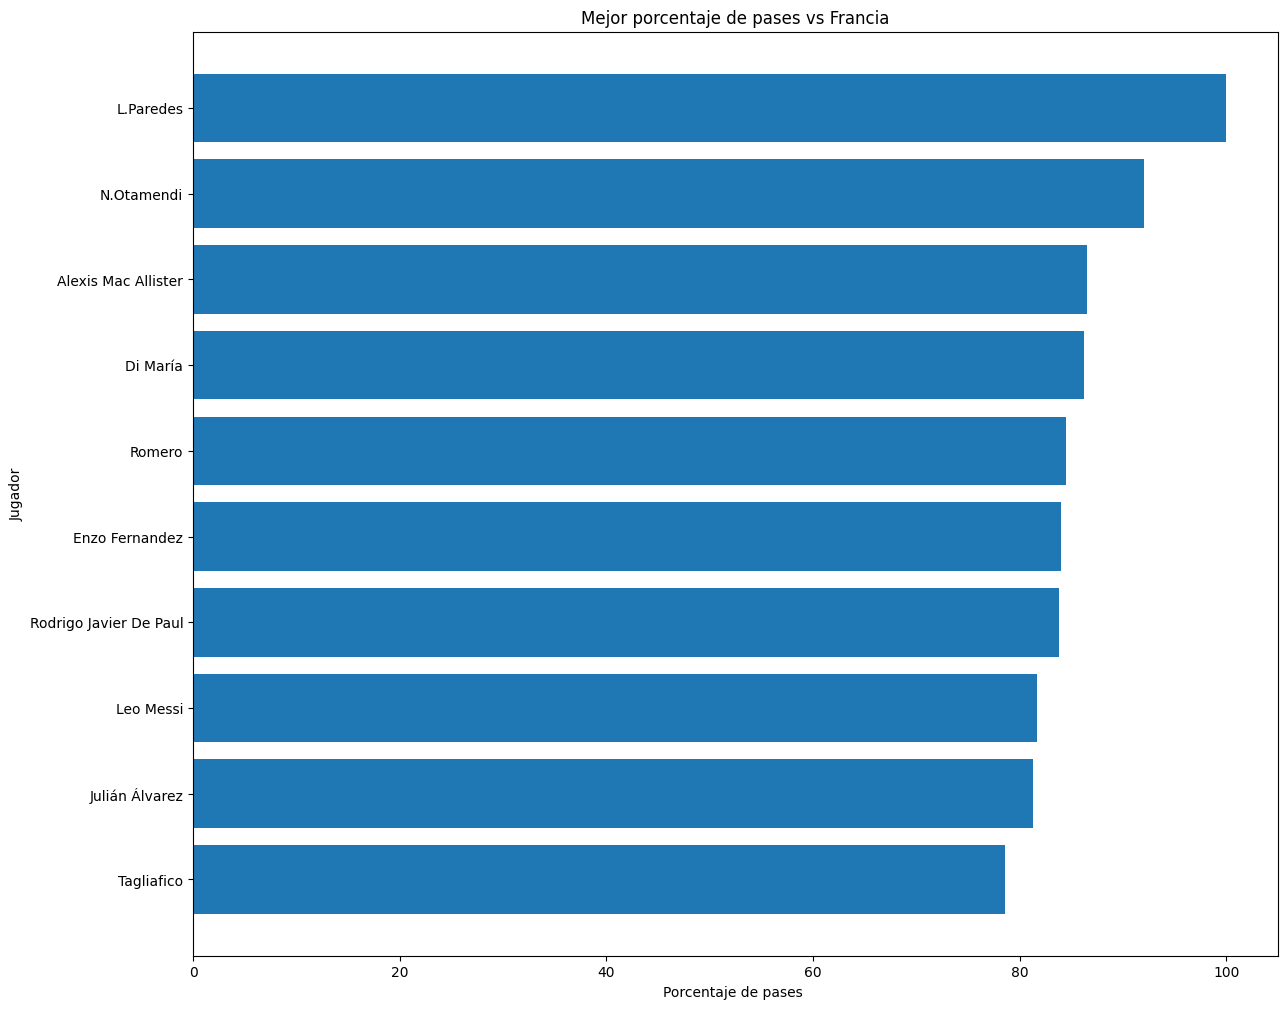

In [18]:
fig = plt.figure(figsize=(14, 12))
ax = plt.axes()
ax.barh(top_10_porcentaje['player'],
top_10_porcentaje['Porcentaje %'])
plt.title("Mejor porcentaje de pases vs Francia")
plt.xlabel("Porcentaje de pases ")
plt.ylabel("Jugador")
plt.show()

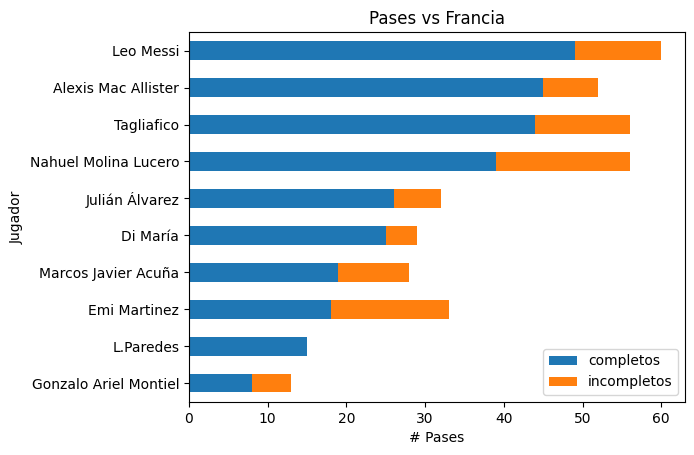

In [21]:
ax = pases_totales[['player','completos','incompletos']].sort_values('completos',
ascending = True).head(10).plot.barh(x='player',stacked=True)
plt.title("Pases vs Francia")
plt.xlabel("# Pases")
plt.ylabel("Jugador")
plt.show()